<a href="https://colab.research.google.com/github/aaronjuma/Deep-Learning-Test-Repo/blob/main/Chess_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aaronjumarang","key":"2f37477bd0af3414596e1e2454fc7145"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download niteshfre/chessman-image-dataset

100% 57.6M/57.6M [00:02<00:00, 41.3MB/s]
100% 57.6M/57.6M [00:02<00:00, 28.6MB/s]


In [ ]:
! mkdir chess

In [ ]:
! unzip chessman-image-dataset.zip -d chess

Archive:  chessman-image-dataset.zip
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000012.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bishop/00000013.jpg  
  inflating: chess/Chessman-image-dataset/Chess/Bisho

In [29]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import os
import pathlib

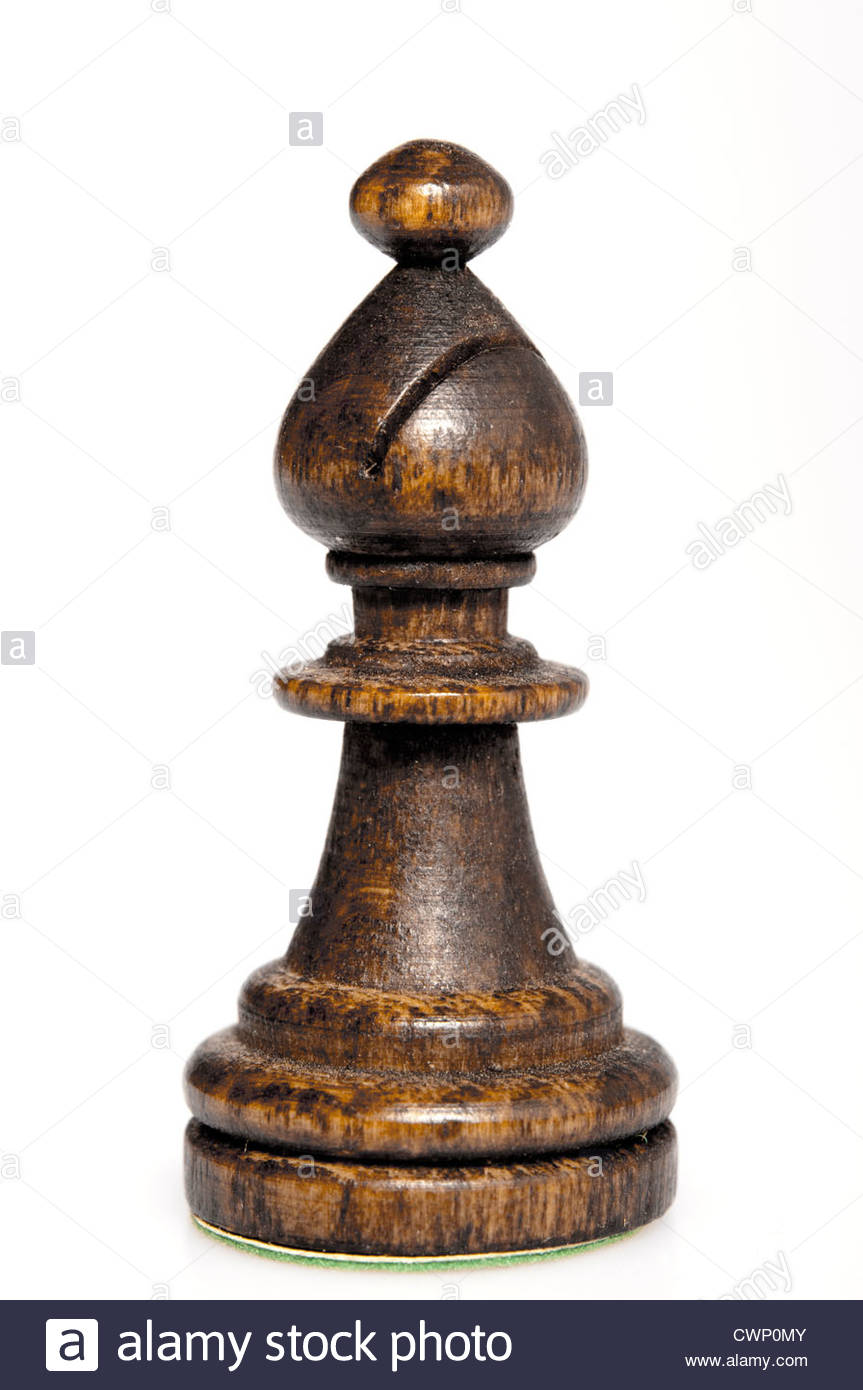

In [30]:
data_dir = pathlib.Path("chess/Chessman-image-dataset/Chess")
bishop = list(data_dir.glob('Bishop/*'))
PIL.Image.open(str(bishop[0]))

In [31]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [33]:
class_names = train_ds.class_names
print(class_names)
for images, labels in train_ds.take(1): 
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


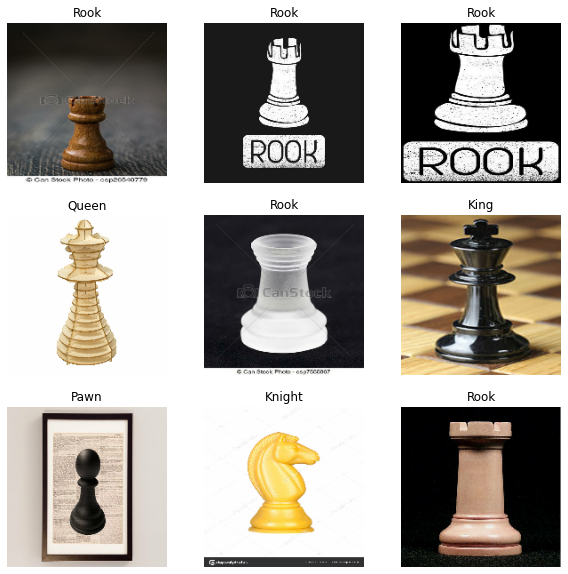

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
num_classes = 6
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [36]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
tf.keras.backend.clear_session()

In [40]:
model.fit(train_ds,epochs=10)

Epoch 1/10
14/14 [==============================] - 0s 28ms/step - loss: 0.2818 - accuracy: 0.9005
Epoch 2/10
14/14 [==============================] - 0s 27ms/step - loss: 0.2800 - accuracy: 0.9050
Epoch 3/10
14/14 [==============================] - 1s 37ms/step - loss: 0.3073 - accuracy: 0.8914
Epoch 4/10
14/14 [==============================] - 0s 29ms/step - loss: 0.2458 - accuracy: 0.9321
Epoch 5/10
14/14 [==============================] - 0s 31ms/step - loss: 0.2045 - accuracy: 0.9457
Epoch 6/10
14/14 [==============================] - 0s 24ms/step - loss: 0.2353 - accuracy: 0.9344
Epoch 7/10
14/14 [==============================] - 0s 25ms/step - loss: 0.1667 - accuracy: 0.9615
Epoch 8/10
14/14 [==============================] - 0s 24ms/step - loss: 0.1361 - accuracy: 0.9615
Epoch 9/10
14/14 [==============================] - 0s 24ms/step - loss: 0.0989 - accuracy: 0.9774
Epoch 10/10
14/14 [==============================] - 0s 24ms/step - loss: 0.0739 - accuracy: 0.9819


In [41]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

4/4 [==============================] - 0s 12ms/step - loss: 3.8485 - accuracy: 0.4636
Test Loss: 3.8484833240509033
Test Accuracy: 0.4636363685131073
